## k-Means Clustering Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('Mall_Customers.csv')
X = df1.iloc[:, [3, 4]].values
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
from sklearn.cluster import KMeans

WCSS = []
for i in range(1, 11):
    classifier = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=52)
    classifier.fit(X)
    WCSS.append(classifier.inertia_) # inertia is another name for WCSS

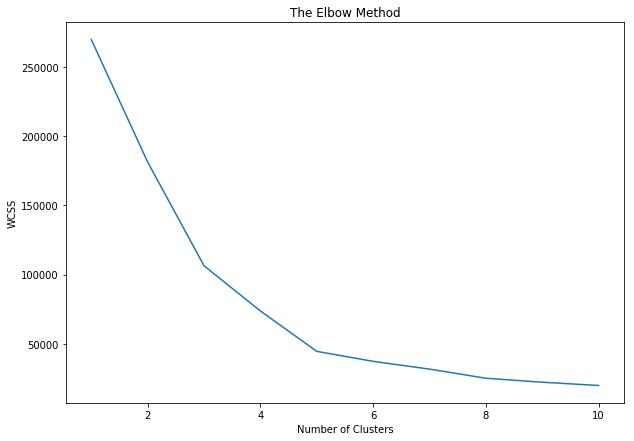

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [16]:
classifier = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10,  random_state=52)
y_kmeans = classifier.fit_predict(X)

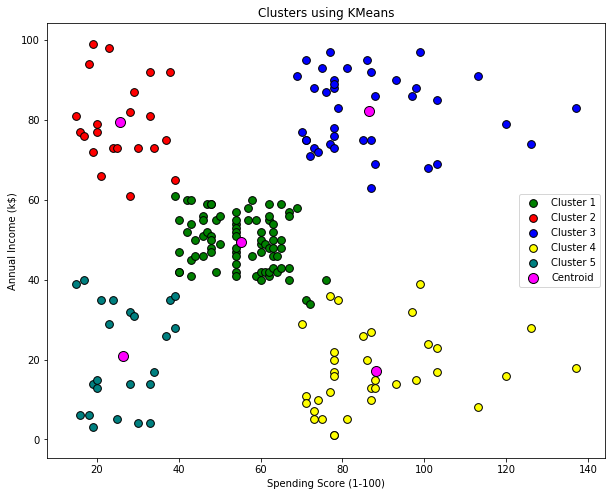

In [20]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='green', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='red', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='teal', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(classifier.cluster_centers_[:, 0], classifier.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

## Minibatch k-Means

In [22]:
df2 = pd.read_csv('Mall_Customers.csv')
X2 = df2.iloc[:, [3, 4]].values
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
from sklearn.cluster import MiniBatchKMeans

classifier2 = MiniBatchKMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10,  random_state=52)
y_minikmeans = classifier2.fit_predict(X2)

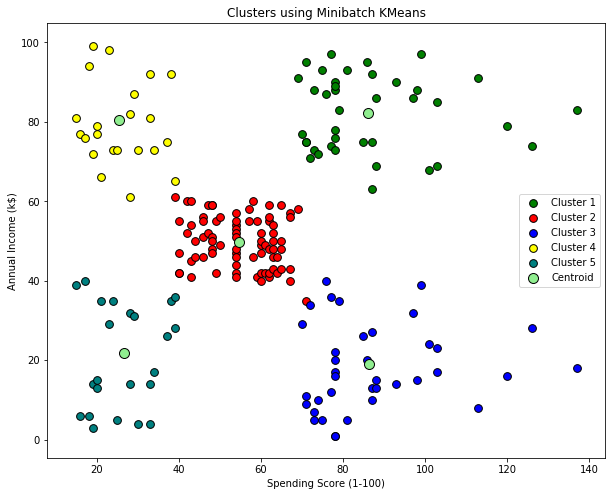

In [43]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X2[y_minikmeans == 0, 0], X2[y_minikmeans == 0, 1], color='green', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X2[y_minikmeans == 1, 0], X2[y_minikmeans == 1, 1], color='red', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X2[y_minikmeans == 2, 0], X2[y_minikmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X2[y_minikmeans == 3, 0], X2[y_minikmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X2[y_minikmeans == 4, 0], X2[y_minikmeans == 4, 1], color='teal', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(classifier2.cluster_centers_[:, 0], classifier2.cluster_centers_[:, 1], color='lightgreen', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using Minibatch KMeans')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

## Hierarchical Clustering

In [35]:
df3 = pd.read_csv('Mall_Customers.csv')

X3 = df3.iloc[:, [3, 4]].values

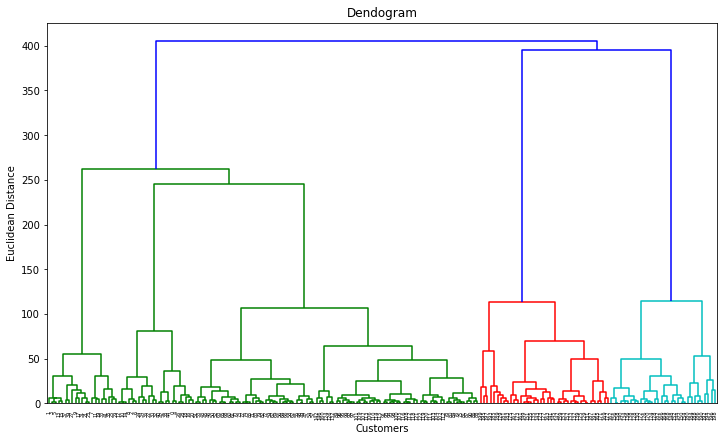

In [38]:
# Using Dendrogram to find the optimal number of clusters

plt.figure(figsize=(12,7))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X3, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [39]:
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X3)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

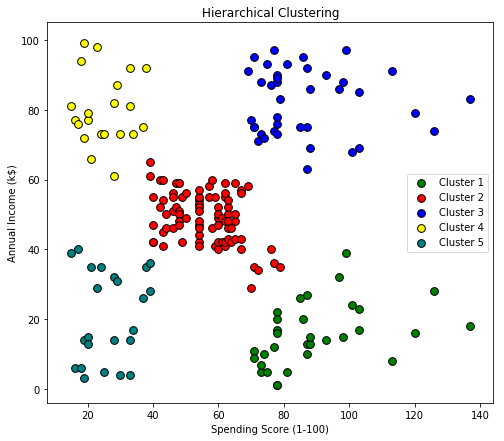

In [46]:
plt.figure(figsize=(8,7))
plt.scatter(X3[y_hc == 0, 0], X3[y_hc == 0, 1], color='green', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X3[y_hc == 1, 0], X3[y_hc == 1, 1], color='red', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X3[y_hc == 2, 0], X3[y_hc == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X3[y_hc == 3, 0], X3[y_hc == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X3[y_hc == 4, 0], X3[y_hc == 4, 1], color='teal', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Hierarchical Clustering')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()